In [1]:
import xarray as xr
import rasterio as rio
import geopandas as gpd
import numpy as np

In [2]:
f = gpd.read_file("../backend/data/ancillary/PARAMS.shp")[['lat', 'lon', 'area_m2']]
# f
f = f.set_index(['lat', 'lon']).rename({'area_m2': 'area'}, axis=1)
f['frac'] = 1

# f = f.drop(['id', 'geometry'], axis=1)

fds = f.to_xarray()

In [3]:
fds

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 9.594 9.656 9.719 9.781 ... 33.59 33.66 33.72 33.78
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    area     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    frac     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [4]:
fds.area.attrs = {
    'long_name': 'area of grid cell',
    'units': 'm2',
    'standard_name': 'AREA'
}

fds.frac.attrs = {
    'long_name': 'fraction of grid cell that is active',
    'units': '1',
}

fds.lat.attrs = {
    'long_name': 'latitude coordinate',
    'units': 'degrees_north',
    'standard_name': 'LAT'
}

fds.lon.attrs = {
    'long_name': 'longitude coordinate',
    'units': 'degrees_east',
    'standard_name': 'LON'
}

In [5]:
# Adding mask
mask = rio.open("../backend/data/ancillary/MASK.tif")
mask_ar = mask.read(1, masked=True).astype(np.int32).filled(0)

mask_da = xr.DataArray(mask_ar, coords=[np.flip(fds.lat.values), fds.lon.values], dims=['lat', 'lon'], name='mask')

mask_da

<xarray.DataArray 'mask' (lat: 388, lon: 237)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

In [6]:
fds['mask'] = mask_da

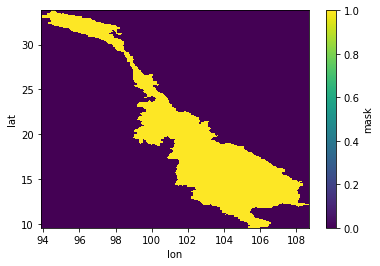

In [7]:
fds.mask.plot()

In [8]:
fds

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 9.594 9.656 9.719 9.781 ... 33.59 33.66 33.72 33.78
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    area     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    frac     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    mask     (lat, lon) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0

In [9]:
fds['lat'] = fds.coords['lat']
fds

fds = fds.reindex(lat=list(reversed(fds.lat)))

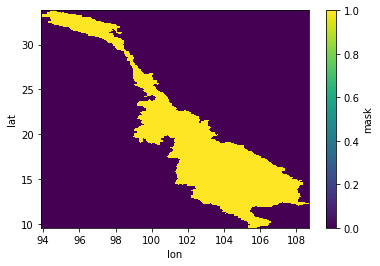

In [11]:
fds.mask.plot()

In [12]:
# fds.to_netcdf("../backend/params/vic/domain.nc")
fds.to_netcdf("../extras/vic_using_metsim_try3/domain.nc")